# *Catbars* for visualizing financial data

In [1]:
import pandas as pd
from catbars import Bars

In [2]:
import catbars.cac40

In [3]:
print(catbars.cac40.__doc__)


Financial data relative to the CAC 40 components
16/03/2020

'data' is a dict mapping company names to a list of three
features with three significant digits:
1. closing price,
2. market cap.,
3. ICB industry sector.

NOTE
An outstanding share number includes the share float but
not treasury shares.

ICB (industry classification benchmark) is a globally
utilized standard for the categorization and
comparison of companies by industry and sector.

SOURCE
https://live.euronext.com/en/markets/paris/equities/list



In [4]:
catbars.cac40.date

'16/03/2020'

In [5]:
df = pd.DataFrame.from_dict(catbars.cac40.data, 
                            orient = 'index', 
                            columns = ['closing_price', 'cap', 'sector'])
df.head()

,closing_price,cap,sector
LVMH,298.0,1.500000e+11,Consumer goods
L'OREAL,208.0,1.160000e+11,Consumer goods
SANOFI,77.0,9.600000e+10,Health care
AIRBUS,69.0,5.400000e+10,Industrials
TOTAL,24.3,6.330000e+10,Oil and gas


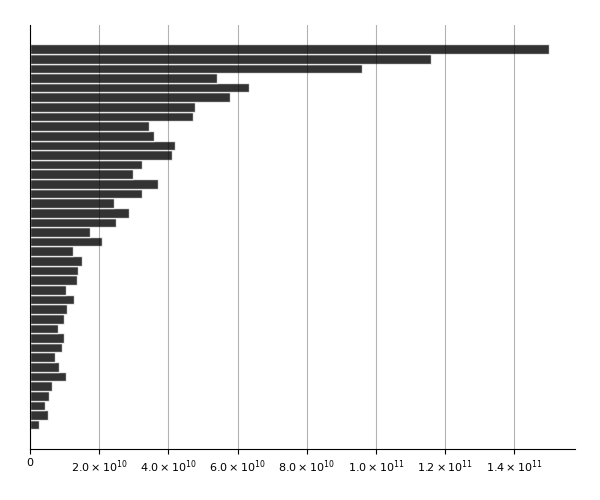

In [6]:
Bars(df['cap'])

In [7]:
df['cap'].median()

19150000000.0

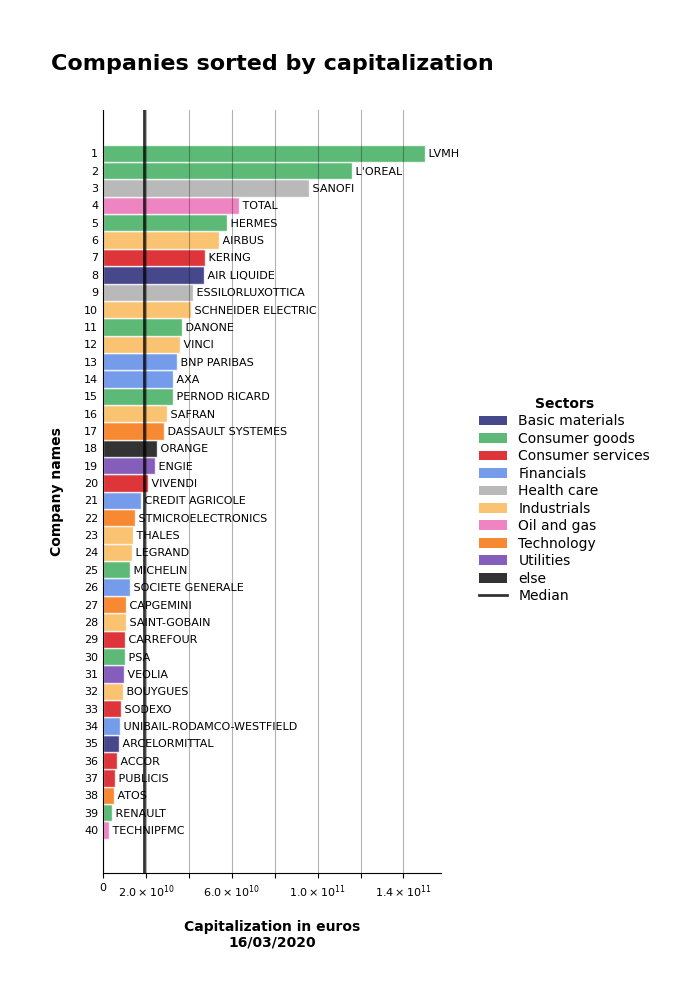

In [8]:
Bars(df['cap'],
    right_labels = df.index,
    colors = df['sector'],
    left_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    title = 'Companies sorted by capitalization',
    legend_title = 'Sectors',
    xlabel = 'Capitalization in euros\n{}'.format(catbars.cac40.date),
    ylabel = 'Company names',
    figsize = (7,10))

## With ```auto_scale```

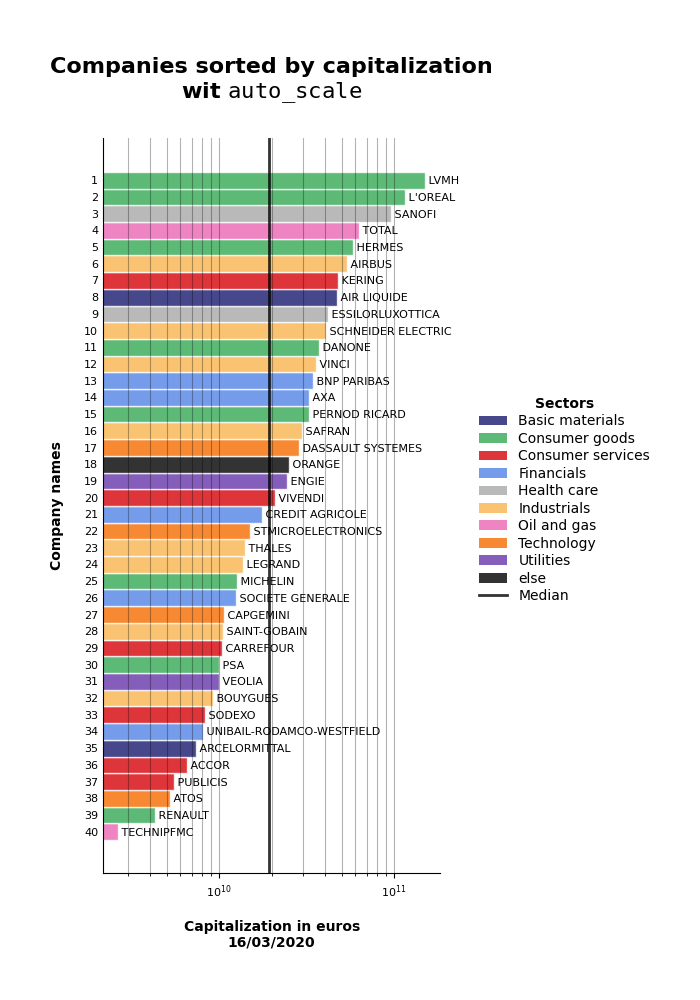

In [9]:
Bars(df['cap'],
    right_labels = df.index,
    colors = df['sector'],
    left_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    title = 'Companies sorted by capitalization\nwit $\mathtt{auto\_scale}$',
    legend_title = 'Sectors',
    xlabel = 'Capitalization in euros\n{}'.format(catbars.cac40.date),
    ylabel = 'Company names',
    figsize = (7,10),
    auto_scale = True)

# If we put name labels on the right, some space is lost.

This is a good reason to favor left labels.

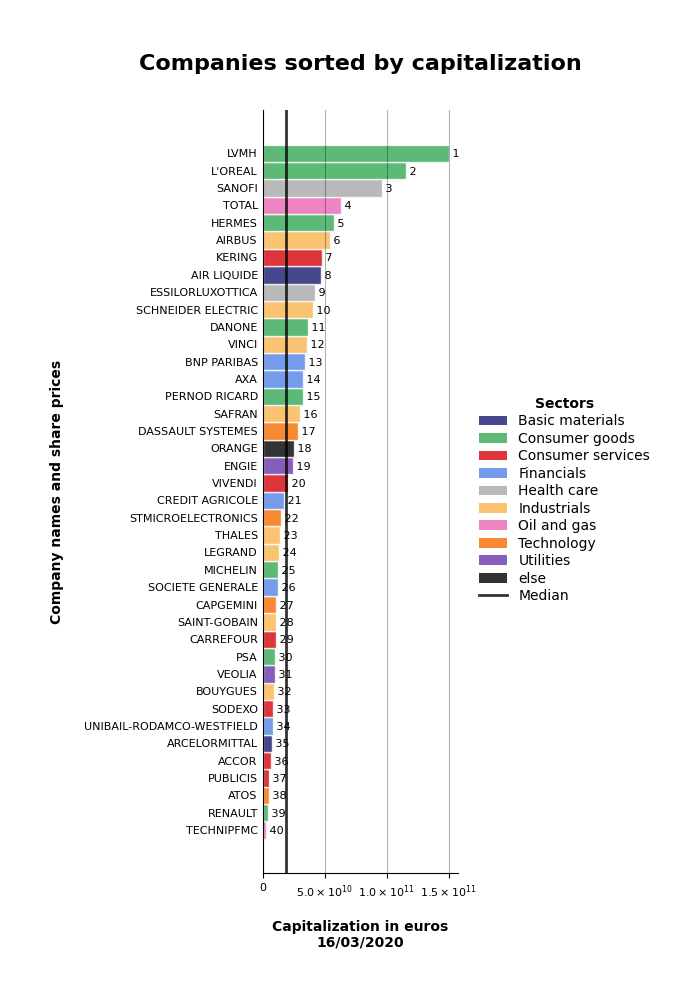

In [10]:
Bars(df['cap'],
    left_labels = df.index,
    colors = df['sector'],
    right_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    title = 'Companies sorted by capitalization',
    legend_title = 'Sectors',
    xlabel = 'Capitalization in euros\n{}'.format(catbars.cac40.date),
    ylabel = 'Company names and share prices',
    figsize = (7,10))

***
## The same bar chart split in 2 parts thanks to ```global_view```

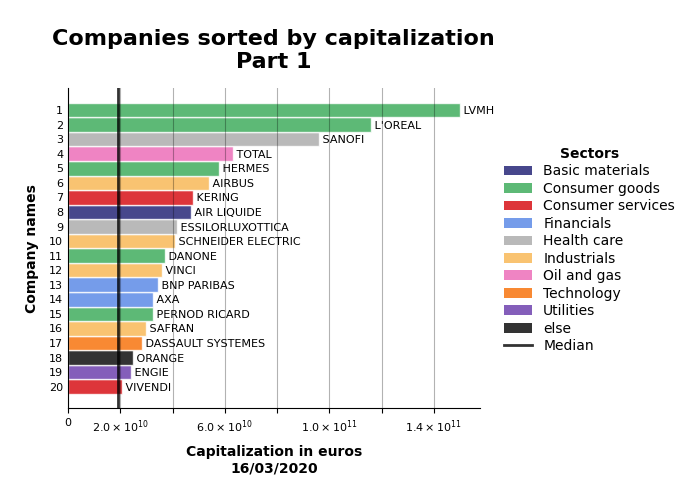

In [11]:
Bars(df['cap'],
    right_labels = df.index,
    colors = df['sector'],
    left_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    title = 'Companies sorted by capitalization\nPart 1',
    legend_title = 'Sectors',
    xlabel = 'Capitalization in euros\n{}'.format(catbars.cac40.date),
    ylabel = 'Company names',
    figsize = (7,5),
    auto_scale = False,
    slice = (1, 20),
    global_view = True)

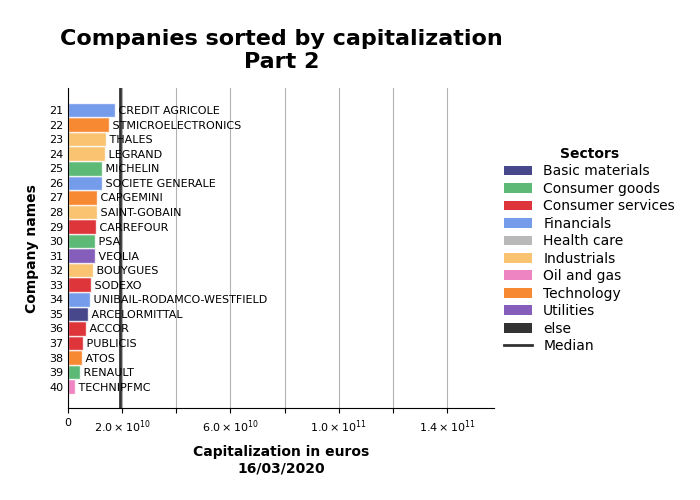

In [12]:
Bars(df['cap'],
    right_labels = df.index,
    colors = df['sector'],
    left_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    title = 'Companies sorted by capitalization\nPart 2',
    legend_title = 'Sectors',
    xlabel = 'Capitalization in euros\n{}'.format(catbars.cac40.date),
    ylabel = 'Company names',
    figsize = (7,5),
    auto_scale = False,
    slice = (21, 40),
    global_view = True)

***
## Another point of view

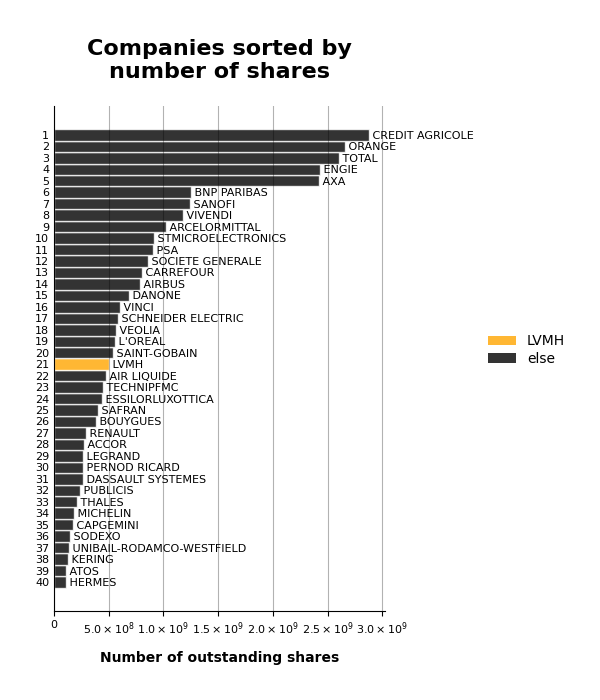

In [13]:
Bars(df['cap'] / df['closing_price'],
    right_labels = df.index,
    colors = df.index,
    left_labels = 'rank',
    sort = True,
    line_dic = {'number' : df['cap'].median(),
                'color' : 'black',
                'label' : 'Median'},
    auto_scale = False,
    color_dic = {'LVMH' : 'orange'},
    title = 'Companies sorted by\nnumber of shares',
    xlabel = 'Number of outstanding shares',
    figsize = (6,7))